### CASO PRACTICO SEMANA 4 - WALMART

#### Alumno: Wilmer Santiago Crisanto

Importar las librerias requeridas

In [446]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Ahora , llamemos a nuestra base de datos a nuestro espacio en el Jupyer Notebook:

In [447]:
df=pd.read_csv("Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


Obtenemos los descriptivos de la base.

In [448]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Como se puede observar el campo Weekly_Sales presenta valores exponenciales, ademas el campo Holiday_Flag muestra los cuartiles como cero lo que podemos intuir que unicamente existen 1 y 0, esto debemos tenerlo en cuenta mas adelante para poder manejar la variable de la mejor manera.

In [449]:
pd.DataFrame(df.Holiday_Flag.value_counts(normalize=True).round(2))

,Holiday_Flag
0,0.93
1,0.07


Aqui podemos verificar lo emncionado anteriormente de la variable Holiday_Flag.

In [450]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

Como podemos observar tambien contamos con la variable Date la cual, dependiendo del análisis o modelo que vaya a implementar debemos buscar la mejor manera de manejarla.

#### Verificación de valores perdidos

In [451]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Como se observa ninguna variable presenta valores perdidos.

In [452]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

''

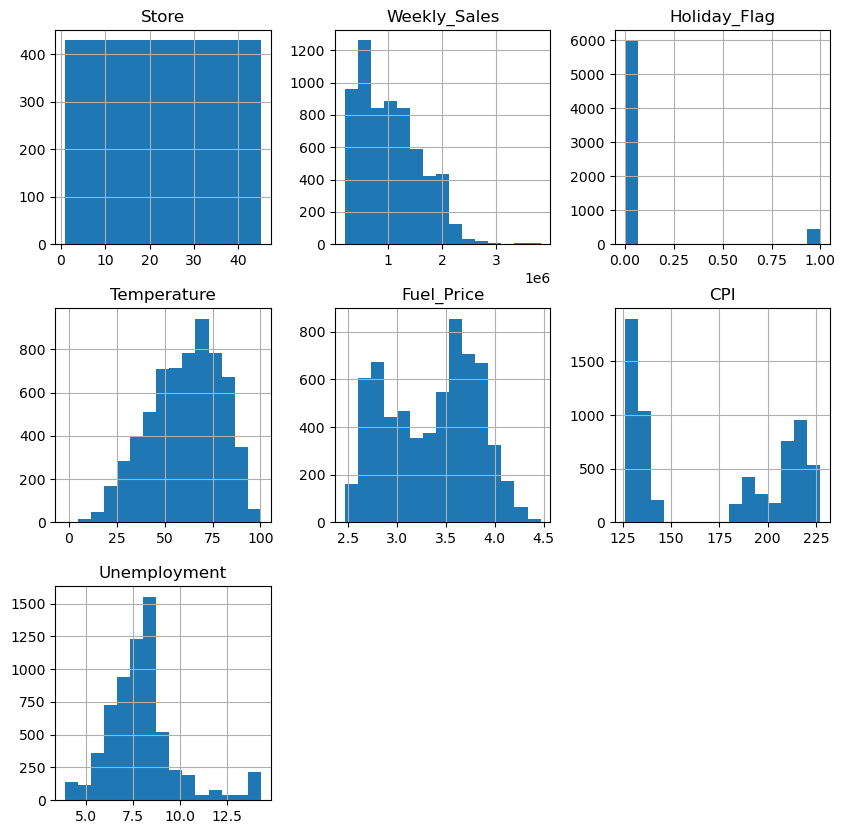

In [453]:
df[var_cuantitativas].hist(bins = 15, figsize = (10,10))
;

A priori no se se visualiza nada fuera de lo común.

#### Verificación de valores extremos

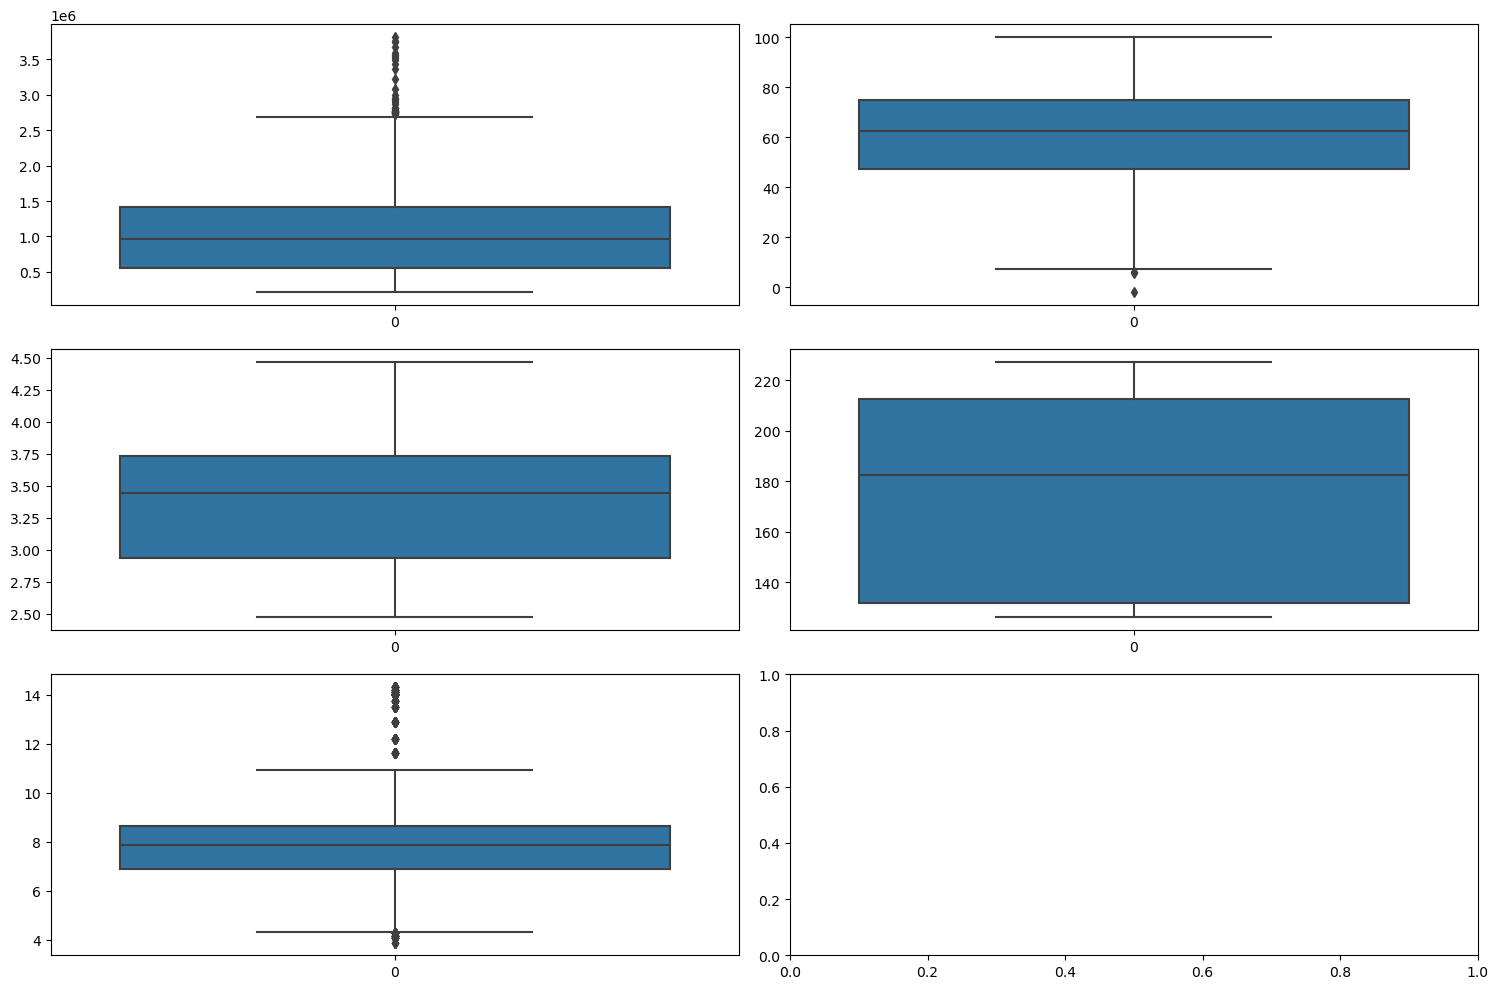

In [454]:
# Box plots
fig, axs = plt.subplots(3,2, figsize = (15,10))
plt2 = sns.boxplot(df['Weekly_Sales'], ax = axs[0,0])
plt1 = sns.boxplot(df['Temperature'], ax = axs[0,1])
plt2 = sns.boxplot(df['Fuel_Price'], ax = axs[1,0])
plt3 = sns.boxplot(df['CPI'], ax = axs[1,1])
plt3 = sns.boxplot(df['Unemployment'], ax = axs[2,0])

plt.tight_layout()

Se observa que las variables Weekly_Sales y Unemployment tienen valores atípicos, estos valores estan muy alejados de la media ,por lo cual se deben tratarlas.

##### Weekly_Sales

<Axes: xlabel='Weekly_Sales', ylabel='Density'>

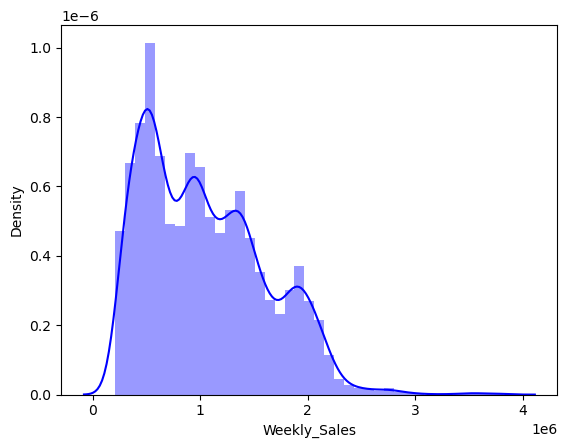

In [455]:
sns.distplot(df['Weekly_Sales'],color="blue")

In [456]:
Q1 = df.Weekly_Sales.quantile(0.25)
Q3 = df.Weekly_Sales.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

866808.5549999999


In [457]:
df = df[~((df['Weekly_Sales'] < (Q1 - 1.5 * IQR)) |(df['Weekly_Sales'] > (Q3 + 1.5 * IQR)))]
df.shape

(6401, 8)

<Axes: xlabel='Weekly_Sales', ylabel='Density'>

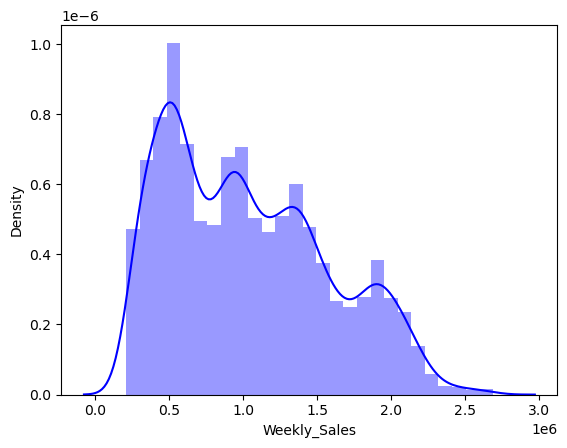

In [458]:
sns.distplot(df['Weekly_Sales'],color="blue")

##### Unemployment

<Axes: xlabel='Unemployment', ylabel='Density'>

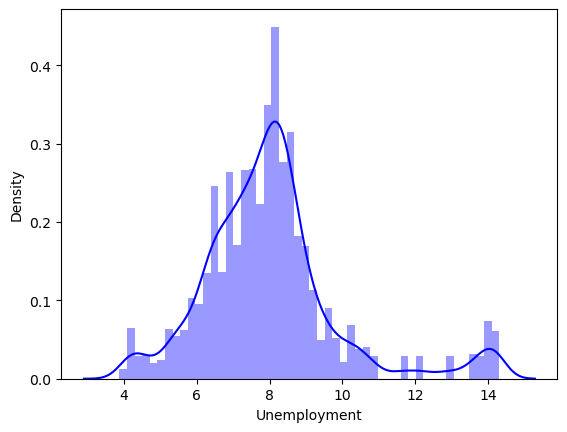

In [459]:
sns.distplot(df['Unemployment'],color="blue")

In [460]:
Q1 = df.Unemployment.quantile(0.25)
Q3 = df.Unemployment.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

1.7309999999999999


In [461]:
df = df[~((df['Unemployment'] < (Q1 - 1.5 * IQR)) |(df['Unemployment'] > (Q3 + 1.5 * IQR)))]
df.shape

(5920, 8)

<Axes: xlabel='Unemployment', ylabel='Density'>

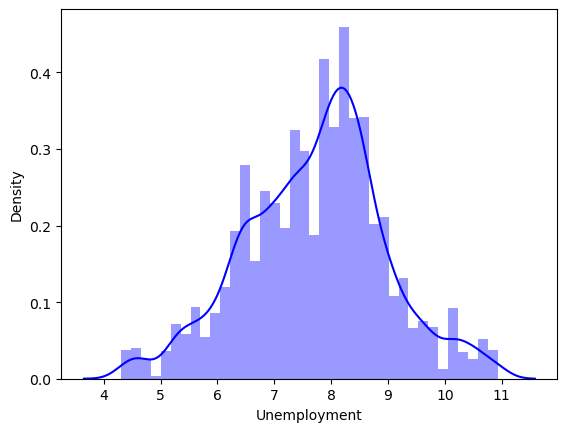

In [462]:
sns.distplot(df['Unemployment'],color="blue")

In [463]:
df.corr().style.background_gradient(cmap='coolwarm')

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,-0.319128,0.004353,-0.026186,0.047717,-0.208596,0.309445
Weekly_Sales,-0.319128,1.000000,0.024442,-0.040918,0.019767,-0.082957,-0.073227
Holiday_Flag,0.004353,0.024442,1.000000,-0.156403,-0.076429,-0.000364,0.011014
Temperature,-0.026186,-0.040918,-0.156403,1.000000,0.145789,0.218164,0.023905
Fuel_Price,0.047717,0.019767,-0.076429,0.145789,1.000000,-0.144272,-0.105187
CPI,-0.208596,-0.082957,-0.000364,0.218164,-0.144272,1.000000,-0.218764
Unemployment,0.309445,-0.073227,0.011014,0.023905,-0.105187,-0.218764,1.000000


Teniendo en cuenta todo lo presentado anteriormente, se decidió relizar un modelo de regresion múltiple, como variable dependiente voy a tomar la Weekly_Sales e inicialmente voy a introducir todas las variables.
La decisión de generar un modelo de regresion múltiple es debido a que se desea entender cómo las variables como la temperatura, el precio del combustible, el IPC y la tasa de desempleo afectan las ventas semanales de Walmart.

Como se mencionó anteriormente tenemos la variable Date para lo cual se decidió transformarla a una variable categórica ya que en nuestro análisis se requiere capturar patrones estacionales o cíclicos asociados con la fecha.

In [464]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Dia_Semana'] = df['Date'].dt.dayofweek  # Día de la semana (0 = lunes, 6 = domingo)
df['Mes'] = df['Date'].dt.month  # Mes (1 = enero, 12 = diciembre)
df['Año'] = df['Date'].dt.year  # Año
df2=df[df.columns.difference(['Date'])]
df2

,Año,CPI,Dia_Semana,Fuel_Price,Holiday_Flag,Mes,Store,Temperature,Unemployment,Weekly_Sales
0,2010,211.096358,4,2.572,0,2,1,42.31,8.106,1643690.90
1,2010,211.242170,4,2.548,1,2,1,38.51,8.106,1641957.44
2,2010,211.289143,4,2.514,0,2,1,39.93,8.106,1611968.17
3,2010,211.319643,4,2.561,0,2,1,46.63,8.106,1409727.59
4,2010,211.350143,4,2.625,0,3,1,46.50,8.106,1554806.68
...,...,...,...,...,...,...,...,...,...,...
6430,2012,192.013558,4,3.997,0,9,45,64.88,8.684,713173.95
6431,2012,192.170412,4,3.985,0,10,45,64.89,8.667,733455.07
6432,2012,192.327265,4,4.000,0,10,45,54.47,8.667,734464.36
6433,2012,192.330854,4,3.969,0,10,45,56.47,8.667,718125.53


Se ocultó la variable Date para que no interfiera con el análisis ya que se tiene por separado el año, mes y día.

In [465]:
df2.dtypes

Año               int64
CPI             float64
Dia_Semana        int64
Fuel_Price      float64
Holiday_Flag      int64
Mes               int64
Store             int64
Temperature     float64
Unemployment    float64
Weekly_Sales    float64
dtype: object

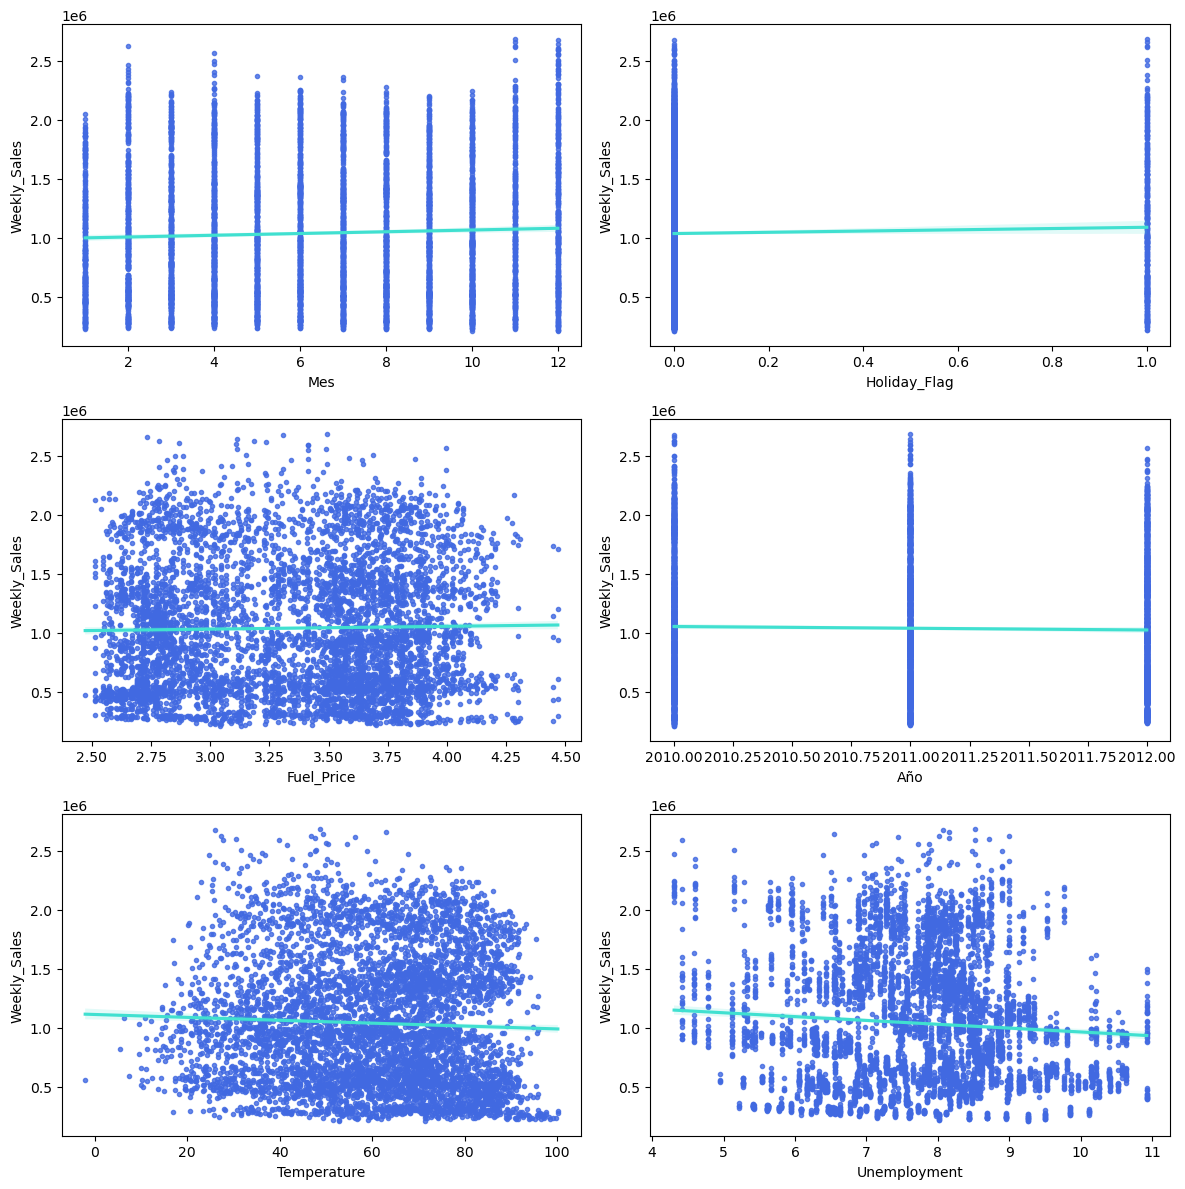

In [466]:
n = 9
fig = plt.figure(figsize=(12,12))
# Correlaciones en pares
corr = df2.corr()
#
cols = corr.nlargest(9, "Weekly_Sales")["Weekly_Sales"].index
# Calculate correlation
for i in np.arange(1,7):
    regline = df2[cols[i]]
    ax = fig.add_subplot(3,2,i)
    sns.regplot(x=regline, y=df2['Weekly_Sales'], scatter_kws={"color": "royalblue", "s": 9},
                line_kws={"color": "turquoise"})
plt.tight_layout()
plt.show()

Se debe aplicar el logaritmo a nuestra variable dependiente.

In [467]:
log_Weekly_Sales=np.log(df2.Weekly_Sales)
df2['Log_Weekly_Sales']=log_Weekly_Sales
df2

,Año,CPI,Dia_Semana,Fuel_Price,Holiday_Flag,Mes,Store,Temperature,Unemployment,Weekly_Sales,Log_Weekly_Sales
0,2010,211.096358,4,2.572,0,2,1,42.31,8.106,1643690.90,14.312455
1,2010,211.242170,4,2.548,1,2,1,38.51,8.106,1641957.44,14.311400
2,2010,211.289143,4,2.514,0,2,1,39.93,8.106,1611968.17,14.292966
3,2010,211.319643,4,2.561,0,2,1,46.63,8.106,1409727.59,14.158907
4,2010,211.350143,4,2.625,0,3,1,46.50,8.106,1554806.68,14.256862
...,...,...,...,...,...,...,...,...,...,...,...
6430,2012,192.013558,4,3.997,0,9,45,64.88,8.684,713173.95,13.477481
6431,2012,192.170412,4,3.985,0,10,45,64.89,8.667,733455.07,13.505522
6432,2012,192.327265,4,4.000,0,10,45,54.47,8.667,734464.36,13.506897
6433,2012,192.330854,4,3.969,0,10,45,56.47,8.667,718125.53,13.484400


Nuestra base de datos se encuentra en estado deseado para la modelación.

In [468]:
df2.corr().style.background_gradient(cmap='coolwarm')

,Año,CPI,Dia_Semana,Fuel_Price,Holiday_Flag,Mes,Store,Temperature,Unemployment,Weekly_Sales,Log_Weekly_Sales
Año,1.000000,0.086893,nan,0.782839,-0.053867,-0.182076,-0.007432,0.083105,-0.242406,-0.021179,-0.018921
CPI,0.086893,1.000000,nan,-0.144272,-0.000364,0.000901,-0.208596,0.218164,-0.218764,-0.082957,-0.085235
Dia_Semana,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Fuel_Price,0.782839,-0.144272,nan,1.000000,-0.076429,-0.029024,0.047717,0.145789,-0.105187,0.019767,0.020455
Holiday_Flag,-0.053867,-0.000364,nan,-0.076429,1.000000,0.119936,0.004353,-0.156403,0.011014,0.024442,0.019373
Mes,-0.182076,0.000901,nan,-0.029024,0.119936,1.000000,0.013893,0.246207,-0.009432,0.043204,0.034642
Store,-0.007432,-0.208596,nan,0.047717,0.004353,0.013893,1.000000,-0.026186,0.309445,-0.319128,-0.270564
Temperature,0.083105,0.218164,nan,0.145789,-0.156403,0.246207,-0.026186,1.000000,0.023905,-0.040918,-0.080283
Unemployment,-0.242406,-0.218764,nan,-0.105187,0.011014,-0.009432,0.309445,0.023905,1.000000,-0.073227,-0.037857
Weekly_Sales,-0.021179,-0.082957,nan,0.019767,0.024442,0.043204,-0.319128,-0.040918,-0.073227,1.000000,0.962133


In [469]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip

In [470]:
#regresion = ols("log_Weekly_Sales ~ CPI + Dia_Semana + Fuel_Price + Mes + Store + Temperature + Unemployment", data=df2)
#results = regresion.fit()

regresion = ols("log_Weekly_Sales ~ CPI + Mes + Dia_Semana + Store + Fuel_Price + Mes + Store + Temperature + Unemployment", data=df2)
results = regresion.fit()

In [471]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       log_Weekly_Sales   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     112.7
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          3.83e-135
Time:                        00:19:38   Log-Likelihood:                -4915.2
No. Observations:                5920   AIC:                             9844.
Df Residuals:                    5913   BIC:                             9891.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8304      0.005    152.105   

En esta línea sabemos que este modelo alcanza a explicar en un 10% la variabilidad de nuestra variable dependiente por medio de la inclusión de todas las variables.

### Verificación de los Supuestos

#### Multicolinearidad 

In [472]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [473]:
df3=df2[df2.columns.difference(['Weekly_Sales', 'Log_Weekly_Sales'])]
df3

,Año,CPI,Dia_Semana,Fuel_Price,Holiday_Flag,Mes,Store,Temperature,Unemployment
0,2010,211.096358,4,2.572,0,2,1,42.31,8.106
1,2010,211.242170,4,2.548,1,2,1,38.51,8.106
2,2010,211.289143,4,2.514,0,2,1,39.93,8.106
3,2010,211.319643,4,2.561,0,2,1,46.63,8.106
4,2010,211.350143,4,2.625,0,3,1,46.50,8.106
...,...,...,...,...,...,...,...,...,...
6430,2012,192.013558,4,3.997,0,9,45,64.88,8.684
6431,2012,192.170412,4,3.985,0,10,45,64.89,8.667
6432,2012,192.327265,4,4.000,0,10,45,54.47,8.667
6433,2012,192.330854,4,3.969,0,10,45,56.47,8.667


In [474]:
df3.dtypes

Año               int64
CPI             float64
Dia_Semana        int64
Fuel_Price      float64
Holiday_Flag      int64
Mes               int64
Store             int64
Temperature     float64
Unemployment    float64
dtype: object

Como se puede observar todas las variables son numericas por lo cual procedemos a calcular el VIF.

In [475]:
vif_data = pd.DataFrame()
vif_data["feature"] = df3.columns
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df3.values, i) for i in range(len(df3.columns))]


print(vif_data)


        feature           VIF
0           Año  3.282333e+00
1           CPI  1.305548e+00
2    Dia_Semana  2.091901e+07
3    Fuel_Price  3.175473e+00
4  Holiday_Flag  1.059791e+00
5           Mes  1.188261e+00
6         Store  1.140998e+00
7   Temperature  1.228061e+00
8  Unemployment  1.235435e+00


Recordemos los rangos del VIF:

Si el VIF es 1, no existe entre las variables analizadas

Si el VIF es >1 y <5, la correlación es moderada entre entre las variables analizadas, pero no constituye a menudo una transgresión grave para requerir atención

Si el VIF es >5, la correlación es potencialmente severa entre entre entre las variables analizadasuna por lo que las estimaciones de los coeficientes y los valores p en el resultado de la regresión probablemente no sean confiables

Por lo tanto, tenemos variables que potencialmente serían un problema.

In [476]:
vif_data = pd.DataFrame()
vif_data["feature"] = df3.columns.difference(['Dia_Semana','Año','Fuel_Price','Unemployment','Temperature'])
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df3[df3.columns.difference(['Dia_Semana','Año','Fuel_Price','Unemployment','Temperature'])].values, i) \
                   for i in range(len(df3[df3.columns.difference(['Dia_Semana','Año','Fuel_Price','Unemployment','Temperature'])].columns))]

print(vif_data)
  

        feature       VIF
0           CPI  5.402321
1  Holiday_Flag  1.089875
2           Mes  4.485325
3         Store  3.263168


Por lo cual, se fue eliminando cada variable enpezando por la que tenia el mayor valor, hasta llegar a los siguientes.

In [490]:
regresion = ols("log_Weekly_Sales ~ Mes + Store", data=df2)
results2 = regresion.fit()

In [491]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:       log_Weekly_Sales   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     238.8
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.89e-100
Time:                        01:52:03   Log-Likelihood:                -5006.0
No. Observations:                5920   AIC:                         1.002e+04
Df Residuals:                    5917   BIC:                         1.004e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.9278      0.021    674.690      0.0

Este seria nuestro modelo el cual explica un 75% la variabilidad de nuestra variable dependiente cuando introducimos el mes y la tienda.

#### Normalidad de los residuos

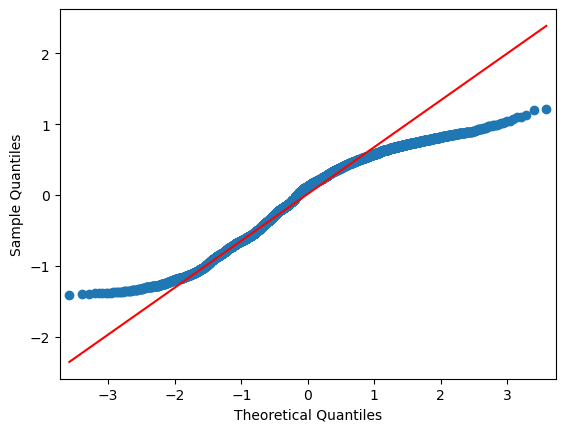

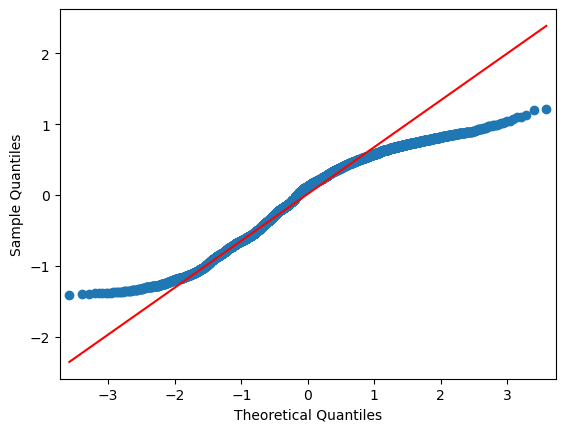

In [488]:
sm.qqplot(results2.resid, line='q')

Como podemos ver, las líneas azules que representan a los residuos caen cerca de la línea recta. Podemos observar en el gráfico de igual manera que existen observaciones que caen muy por fuera de la línea, por lo que un análisis con la prueba de Jarque-Bera para validar la hipótesis de normalidad en residuos podría ser útil.

In [492]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [493]:
nombres = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
jarque_bera = sms.jarque_bera(results2.resid)
lzip(nombres, jarque_bera)

[('Jarque-Bera', 365.57761053937384),
 ('Chi^2 two-tail prob.', 4.128863427048192e-80),
 ('Skew', -0.49024818850878965),
 ('Kurtosis', 2.278405758937931)]

Como se puede observar los datos no siguen una distrubución normal, de la misma manera tenemos un valor muy por debajo a 0.05 por que se rechaza la hipotesis nula lo cual no se ajusta a una distrubución normal.

In [494]:
results2.resid.mean()

-9.750758758978132e-15

La media de los residuos tiende a cero y es muy pequeña por lo que no se estaría violando este supuesto.

#### Homocedasticidad en los residuos

In [480]:
y_pred=results2.predict()

Text(0.5, 1.0, 'Gráfica de residuos')

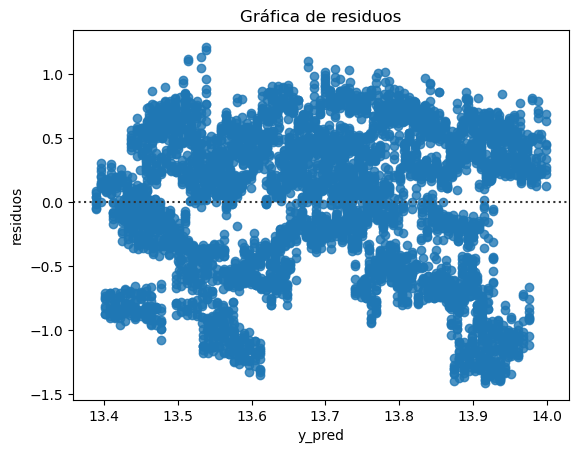

In [481]:
sns.residplot(x=y_pred, y=results2.resid)
plt.xlabel("y_pred")
plt.ylabel("residuos")
plt.title("Gráfica de residuos")

De la gráfica de residuos anterior, podríamos inferir que los residuos no formaron ningún patrón. Por lo tanto, los residuos son independientes entre sí.

Y además, los residuos tienen varianza constante. La varianza no parece aumentar/disminuir constantemente con el valor y_pred.

In [495]:
nombres = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
breuschpagan = sms.het_breuschpagan(results2.resid, results.model.exog)
lzip(nombres, breuschpagan)

[('Lagrange multiplier statistic', 397.2844947769378),
 ('p-value', 9.116821826521998e-82),
 ('f-value', 70.89336201229115),
 ('f p-value', 1.2701552193434446e-85)]

In [496]:
df3

,Año,CPI,Dia_Semana,Fuel_Price,Holiday_Flag,Mes,Store,Temperature,Unemployment
0,2010,211.096358,4,2.572,0,2,1,42.31,8.106
1,2010,211.242170,4,2.548,1,2,1,38.51,8.106
2,2010,211.289143,4,2.514,0,2,1,39.93,8.106
3,2010,211.319643,4,2.561,0,2,1,46.63,8.106
4,2010,211.350143,4,2.625,0,3,1,46.50,8.106
...,...,...,...,...,...,...,...,...,...
6430,2012,192.013558,4,3.997,0,9,45,64.88,8.684
6431,2012,192.170412,4,3.985,0,10,45,64.89,8.667
6432,2012,192.327265,4,4.000,0,10,45,54.47,8.667
6433,2012,192.330854,4,3.969,0,10,45,56.47,8.667


In [500]:
#df4=df3[df3.columns.difference(['area', 'cuartos', 'banios', 'precio', 'log_precio'])]
# df3['intercepto']=1
df4=df3[[ 'Mes', 'Store']]
df4

,Mes,Store
0,2,1
1,2,1
2,2,1
3,2,1
4,3,1
...,...,...
6430,9,45
6431,10,45
6432,10,45
6433,10,45


In [482]:
results2.predict()

array([13.92963304, 13.92963304, 13.92963304, ..., 13.45163434,
       13.45163434, 13.45163434])

In [501]:
y_pred=results2.predict(df4)
y_pred

0       13.929633
1       13.929633
2       13.929633
3       13.929633
4       13.936619
          ...    
6430    13.444648
6431    13.451634
6432    13.451634
6433    13.451634
6434    13.451634
Length: 5920, dtype: float64

In [484]:
df2.Log_Weekly_Sales

0       14.312455
1       14.311400
2       14.292966
3       14.158907
4       14.256862
          ...    
6430    13.477481
6431    13.505522
6432    13.506897
6433    13.484400
6434    13.541444
Name: Log_Weekly_Sales, Length: 5920, dtype: float64

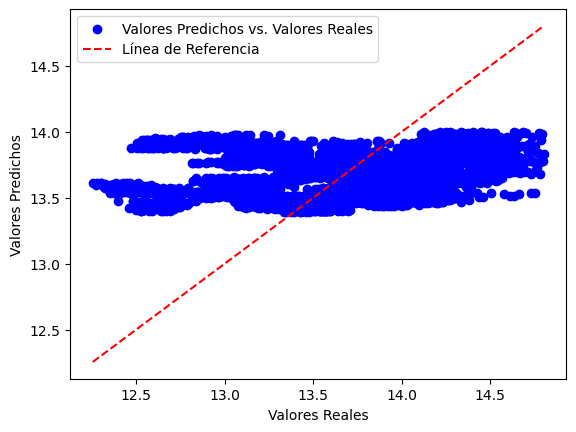

In [502]:
plt.scatter(df2.Log_Weekly_Sales, y_pred, color='blue', label='Valores Predichos vs. Valores Reales')

# Agregar etiquetas a los ejes
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')

# Agregar una línea de referencia diagonal (y = x) para comparación
plt.plot([min(df2.Log_Weekly_Sales), max(df2.Log_Weekly_Sales)], [min(df2.Log_Weekly_Sales), max(df2.Log_Weekly_Sales)], linestyle='--', color='red', label='Línea de Referencia')

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

Como se puede ver en el gráfico los valores no se ajustan pero es común que los puntos en el gráfico de valores predichos vs. valores reales no se ajusten perfectamente a la línea de referencia debido a la naturaleza de los datos y las limitaciones del modelo, ya que puede deberse a varios factores como: ruido en los datos, errores en la medición o variables no consideradas.
Por lo cual es necesario complementar este analisis con uno de series de tiempos o un econométrico y así poder llegar un analisis mas certero.